In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
smartphone_df = pd.read_csv('smartphones.csv')
smartphone_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [3]:
smartphone_df.columns.unique()

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [4]:
new_smartphone_df = smartphone_df[['price', 'has_5g', 'has_nfc', 'num_cores', 'processor_speed',
                                   'battery_capacity', 'ram_capacity', 'internal_memory', 'screen_size',
                                   'refresh_rate', 'num_rear_cameras']].dropna()
new_smartphone_df.head()

,price,has_5g,has_nfc,num_cores,processor_speed,battery_capacity,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras
0,54999,True,True,8.0,3.2,5000.0,12.0,256.0,6.70,120,3
1,19989,True,False,8.0,2.2,5000.0,6.0,128.0,6.59,120,3
2,16499,True,False,8.0,2.4,5000.0,4.0,64.0,6.60,90,3
3,14999,True,False,8.0,2.2,5000.0,6.0,128.0,6.55,120,3
4,24999,True,False,8.0,2.6,5000.0,6.0,128.0,6.70,120,3


In [5]:
dict_type = {'price':float, 'has_5g':float, 'has_nfc':float, 'refresh_rate':float, 'num_rear_cameras':float}
new_smartphone_df = new_smartphone_df.astype(dict_type)
new_smartphone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             928 non-null    float64
 1   has_5g            928 non-null    float64
 2   has_nfc           928 non-null    float64
 3   num_cores         928 non-null    float64
 4   processor_speed   928 non-null    float64
 5   battery_capacity  928 non-null    float64
 6   ram_capacity      928 non-null    float64
 7   internal_memory   928 non-null    float64
 8   screen_size       928 non-null    float64
 9   refresh_rate      928 non-null    float64
 10  num_rear_cameras  928 non-null    float64
dtypes: float64(11)
memory usage: 87.0 KB


In [6]:
df_range = (new_smartphone_df.max(axis=0) - new_smartphone_df.min(axis=0))
df_min_max = (new_smartphone_df - new_smartphone_df.min(axis=0))/ df_range
df_min_max

,price,has_5g,has_nfc,num_cores,processor_speed,battery_capacity,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras
0,0.079660,1.0,1.0,1.0,0.990099,0.157540,0.647059,0.244094,0.703786,0.333333,0.666667
1,0.025507,1.0,0.0,1.0,0.495050,0.157540,0.294118,0.118110,0.679287,0.333333,0.666667
2,0.020108,1.0,0.0,1.0,0.594059,0.157540,0.176471,0.055118,0.681514,0.166667,0.666667
3,0.017788,1.0,0.0,1.0,0.495050,0.157540,0.294118,0.118110,0.670379,0.333333,0.666667
4,0.033256,1.0,0.0,1.0,0.693069,0.157540,0.294118,0.118110,0.703786,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
974,0.180187,1.0,1.0,1.0,0.990099,0.147629,0.647059,0.244094,1.000000,0.333333,0.666667
975,0.048710,1.0,0.0,1.0,0.891089,0.157540,0.411765,0.118110,0.697105,0.333333,0.666667
976,0.017774,1.0,0.0,1.0,0.495050,0.157540,0.294118,0.118110,0.659243,0.000000,0.666667
977,0.039429,1.0,1.0,1.0,0.816832,0.161505,0.411765,0.244094,0.681514,0.466667,0.666667


In [7]:
scores = []
for k_cluster in range(2, 14):
    model = KMeans(n_clusters=k_cluster, n_init=10)
    model.fit(df_min_max)
    score = model.inertia_
    scores.append((k_cluster, score))

In [8]:
scores_df = pd.DataFrame(scores, columns=['cluster', 'score'])
scores_df

,cluster,score
0,2,345.568756
1,3,213.980281
2,4,166.389092
3,5,126.197830
4,6,101.324914
5,7,90.305803
6,8,83.519691
7,9,77.688164
8,10,72.407953
9,11,69.843099


Text(0, 0.5, 'Score')

<Figure size 1600x1000 with 0 Axes>

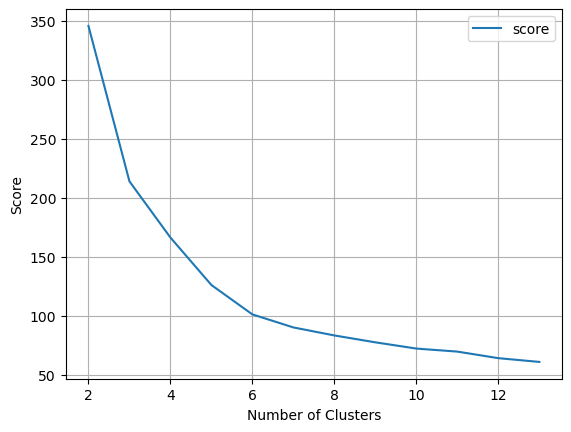

In [9]:
fig = plt.figure(figsize=(16,10))
scores_df.plot('cluster', 'score')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

In [10]:
cluster_model = KMeans(n_clusters=5, n_init=10)
cluster_model.fit(df_min_max)

clusters = cluster_model.predict(df_min_max)
smartphone_clusters = pd.DataFrame(clusters, index=df_min_max.index, columns=['Cluster'])

smartphone_clusters['Cluster'].value_counts()

Cluster
0    330
1    302
2    207
3     53
4     36
Name: count, dtype: int64

In [11]:
merged_with_clusters = smartphone_clusters.join(new_smartphone_df)
merged_with_clusters.head()

,Cluster,price,has_5g,has_nfc,num_cores,processor_speed,battery_capacity,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras
0,1,54999.0,1.0,1.0,8.0,3.2,5000.0,12.0,256.0,6.70,120.0,3.0
1,2,19989.0,1.0,0.0,8.0,2.2,5000.0,6.0,128.0,6.59,120.0,3.0
2,2,16499.0,1.0,0.0,8.0,2.4,5000.0,4.0,64.0,6.60,90.0,3.0
3,2,14999.0,1.0,0.0,8.0,2.2,5000.0,6.0,128.0,6.55,120.0,3.0
4,2,24999.0,1.0,0.0,8.0,2.6,5000.0,6.0,128.0,6.70,120.0,3.0


Text(0, 0.5, 'Number of Processor Cores')

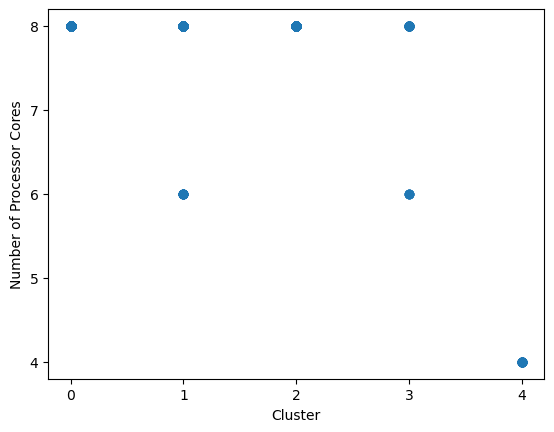

In [12]:
plt.scatter(merged_with_clusters['Cluster'], merged_with_clusters['num_cores'])
plt.xticks(np.arange(min(merged_with_clusters['Cluster']), max(merged_with_clusters['Cluster'] + 1)))
plt.yticks(np.arange(min(merged_with_clusters['num_cores']), max(merged_with_clusters['num_cores'] + 1)))
plt.xlabel('Cluster')
plt.ylabel('Number of Processor Cores')

Text(0, 0.5, 'Processor Speed')

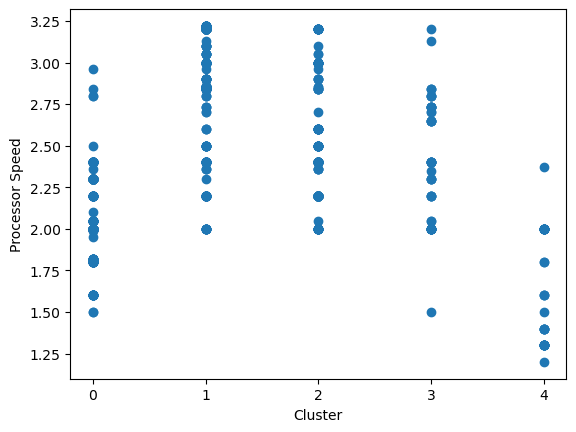

In [13]:
plt.scatter(merged_with_clusters['Cluster'], merged_with_clusters['processor_speed'])
plt.xticks(np.arange(min(merged_with_clusters['Cluster']), max(merged_with_clusters['Cluster'] + 1)))
plt.xlabel('Cluster')
plt.ylabel('Processor Speed')

Text(0, 0.5, 'Refresh Rate')

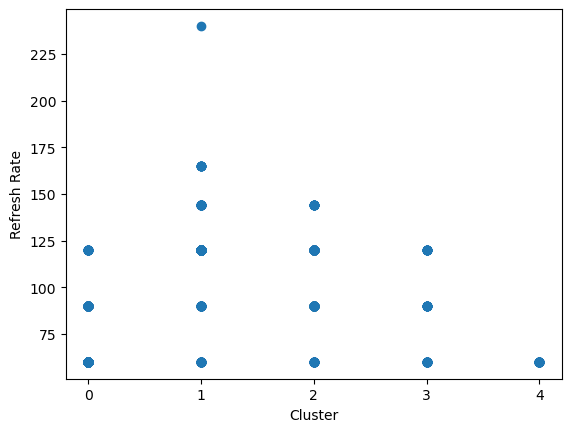

In [14]:
plt.scatter(merged_with_clusters['Cluster'], merged_with_clusters['refresh_rate'])
plt.xticks(np.arange(min(merged_with_clusters['Cluster']), max(merged_with_clusters['Cluster'] + 1)))
plt.xlabel('Cluster')
plt.ylabel('Refresh Rate')

Text(0, 0.5, 'Has 5g')

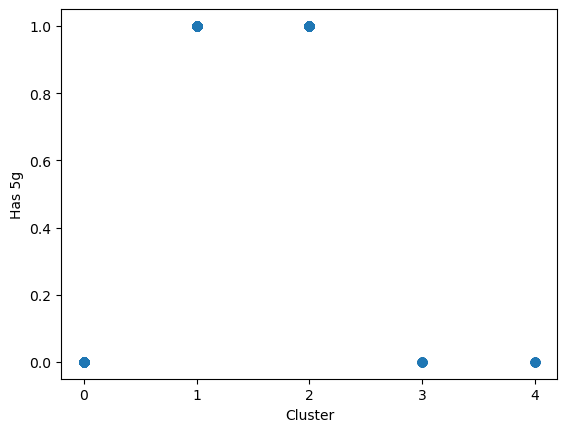

In [15]:
plt.scatter(merged_with_clusters['Cluster'], merged_with_clusters['has_5g'])
plt.xticks(np.arange(min(merged_with_clusters['Cluster']), max(merged_with_clusters['Cluster'] + 1)))
plt.xlabel('Cluster')
plt.ylabel('Has 5g')

Text(0, 0.5, 'Ram Capacity')

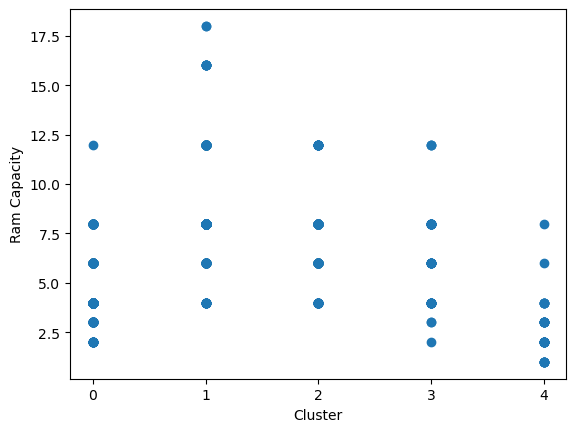

In [16]:
plt.scatter(merged_with_clusters['Cluster'], merged_with_clusters['ram_capacity'])
plt.xticks(np.arange(min(merged_with_clusters['Cluster']), max(merged_with_clusters['Cluster'] + 1)))
plt.xlabel('Cluster')
plt.ylabel('Ram Capacity')

Text(0, 0.5, 'Price')

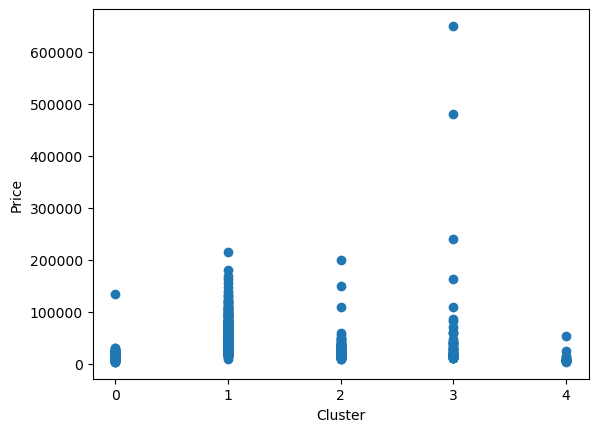

In [17]:
plt.scatter(merged_with_clusters['Cluster'], merged_with_clusters['price'])
plt.xticks(np.arange(min(merged_with_clusters['Cluster']), max(merged_with_clusters['Cluster'] + 1)))
plt.xlabel('Cluster')
plt.ylabel('Price')